In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [ ]:
from keras.utils import to_categorical
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)
# Flatten the images
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))

#PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint
import numpy as np
# Flatten the images
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))
# Define pipeline
PCA_pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', KNeighborsClassifier())
])

# Define the parameter grid
n_components = [int(x) for x in np.linspace(start = 1, stop = x_train_flat.shape[1] * 0.05, num = 10)]
param_grid = {
    'reduce_dim__n_components': n_components,
    'classify__n_neighbors': randint(1, 30)
}

# Create the random search object
PCA_search = RandomizedSearchCV(PCA_pipe, param_distributions=param_grid,
                            n_iter=20, cv=5, n_jobs=-1, verbose=2)

# Fit the model
PCA_search.fit(x_train_flat, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('reduce_dim', PCA()),
                                             ('classify',
                                              KNeighborsClassifier())]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'classify__n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7458c1cb50>,
                                        'reduce_dim__n_components': [1, 5, 9,
                                                                     13, 17, 22,
                                                                     26, 30, 34,
                                                                     39]},
                   verbose=2)

In [ ]:
from joblib import dump

# Save the best model
dump(PCA_search.best_estimator_, '/content/drive/MyDrive/best_pca.pkl')

['/content/drive/MyDrive/best_pca.pkl']

In [ ]:
from joblib import load
from sklearn.metrics import classification_report
# Load the best model
best_pca = load('/content/drive/MyDrive/best_pca.pkl')

# Use the model for predictions
y_pred = best_pca.predict(x_train_flat)
report = classification_report(y_train, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      6000
           1       0.99      0.97      0.98      6000
           2       0.79      0.81      0.80      6000
           3       0.90      0.89      0.90      6000
           4       0.78      0.82      0.80      6000
           5       0.97      0.90      0.93      6000
           6       0.73      0.62      0.67      6000
           7       0.91      0.93      0.92      6000
           8       0.96      0.96      0.96      6000
           9       0.91      0.96      0.93      6000

    accuracy                           0.87     60000
   macro avg       0.87      0.87      0.87     60000
weighted avg       0.87      0.87      0.87     60000



In [ ]:
y_pred = best_pca.predict(x_test_flat)
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1000
           1       0.99      0.96      0.97      1000
           2       0.75      0.77      0.76      1000
           3       0.89      0.87      0.88      1000
           4       0.75      0.77      0.76      1000
           5       0.97      0.87      0.92      1000
           6       0.64      0.59      0.61      1000
           7       0.89      0.94      0.91      1000
           8       0.94      0.96      0.95      1000
           9       0.91      0.95      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



#Isomap

In [ ]:
from sklearn.manifold import Isomap
# Taking a subset of the data
subset_size = 5000
x_train_subset = x_train_flat[:subset_size]
y_train_subset = y_train[:subset_size]

# Define pipeline
Isomap_pipe = Pipeline([
    ('reduce_dim', Isomap()),
    ('classify', KNeighborsClassifier())
])

# Define the parameter grid
n_components = [int(x) for x in np.linspace(start = 1, stop = x_train_subset.shape[1] * 0.05, num = 10)]
param_grid = {
    'reduce_dim__n_components': n_components,
    'classify__n_neighbors': randint(1, 30)
}

# Create the random search object
Isomap_search = RandomizedSearchCV(Isomap_pipe, param_distributions=param_grid,
                            n_iter=20, cv=5, n_jobs=-1, verbose=2)

# Fit the model
Isomap_search.fit(x_train_subset, y_train_subset)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('reduce_dim', Isomap()),
                                             ('classify',
                                              KNeighborsClassifier())]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'classify__n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7458130eb0>,
                                        'reduce_dim__n_components': [1, 5, 9,
                                                                     13, 17, 22,
                                                                     26, 30, 34,
                                                                     39]},
                   verbose=2)

In [ ]:
from joblib import dump

# Save the best model
dump(Isomap_search.best_estimator_, '/content/drive/MyDrive/best_isomap.pkl')

['/content/drive/MyDrive/best_isomap.pkl']

In [ ]:
from joblib import load
from sklearn.metrics import classification_report
# Load the best model
best_isomap = load('/content/drive/MyDrive/best_isomap.pkl')

# Use the model for predictions
y_pred = best_isomap.predict(x_train_flat)
report = classification_report(y_train, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.71      0.82      0.76      6000
           1       0.99      0.93      0.96      6000
           2       0.62      0.69      0.65      6000
           3       0.83      0.82      0.82      6000
           4       0.65      0.66      0.65      6000
           5       0.88      0.80      0.84      6000
           6       0.53      0.46      0.49      6000
           7       0.84      0.85      0.85      6000
           8       0.96      0.89      0.92      6000
           9       0.87      0.93      0.90      6000

    accuracy                           0.79     60000
   macro avg       0.79      0.79      0.78     60000
weighted avg       0.79      0.79      0.78     60000



In [ ]:
y_pred = best_isomap.predict(x_test_flat)
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.72      0.80      0.76      1000
           1       0.98      0.92      0.95      1000
           2       0.61      0.68      0.64      1000
           3       0.82      0.79      0.81      1000
           4       0.64      0.63      0.64      1000
           5       0.89      0.80      0.84      1000
           6       0.51      0.48      0.49      1000
           7       0.84      0.85      0.85      1000
           8       0.94      0.88      0.91      1000
           9       0.85      0.93      0.89      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



#AutoEncoder

##Dense

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

input_dim = x_train_flat.shape[1]

# Autoencoder with 16-dimensional latent space
input_layer = Input(shape=(input_dim,))
encoder16_layer = Dense(16, activation='relu')(input_layer)
decoder16_layer = Dense(input_dim, activation='sigmoid')(encoder16_layer)
autoencoder_16 = Model(input_layer, decoder16_layer)
autoencoder_16.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_16.fit(x_train_flat, x_train_flat, epochs=10, batch_size=256, validation_data=(x_test_flat, x_test_flat))

# Autoencoder with 32-dimensional latent space
input_layer = Input(shape=(input_dim,))
encoder32_layer = Dense(32, activation='relu')(input_layer)
decoder32_layer = Dense(input_dim, activation='sigmoid')(encoder32_layer)
autoencoder_32 = Model(input_layer, decoder32_layer)
autoencoder_32.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_32.fit(x_train_flat, x_train_flat, epochs=10, batch_size=256, validation_data=(x_test_flat, x_test_flat))
# Saving the models
autoencoder_16.save('/content/drive/MyDrive/autoencoder_16.h5')
autoencoder_32.save('/content/drive/MyDrive/autoencoder_32.h5')

Epoch 1/10
235/235 [==============================] - 7s 27ms/step - loss: 0.4455 - val_loss: 0.3704
Epoch 2/10
235/235 [==============================] - 4s 18ms/step - loss: 0.3441 - val_loss: 0.3316
Epoch 3/10
235/235 [==============================] - 4s 16ms/step - loss: 0.3238 - val_loss: 0.3207
Epoch 4/10
235/235 [==============================] - 5s 22ms/step - loss: 0.3151 - val_loss: 0.3137
Epoch 5/10
235/235 [==============================] - 4s 17ms/step - loss: 0.3092 - val_loss: 0.3089
Epoch 6/10
235/235 [==============================] - 5s 21ms/step - loss: 0.3053 - val_loss: 0.3063
Epoch 7/10
235/235 [==============================] - 4s 18ms/step - loss: 0.3029 - val_loss: 0.3042
Epoch 8/10
235/235 [==============================] - 4s 19ms/step - loss: 0.3014 - val_loss: 0.3030
Epoch 9/10
235/235 [==============================] - 4s 15ms/step - loss: 0.3005 - val_loss: 0.3023
Epoch 10/10
235/235 [==============================] - 4s 18ms/step - loss: 0.2999 - val_lo

In [ ]:
encoder_32 = Model(inputs=autoencoder_32.input, outputs=autoencoder_32.layers[1].output)
encoder_16 = Model(inputs=autoencoder_16.input, outputs=autoencoder_16.layers[1].output)

x_train_encoded_32 = encoder_32.predict(x_train_flat)
x_train_encoded_16= encoder_16.predict(x_train_flat)

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
# Define the parameter grid
param_grid = {
    'n_neighbors': randint(1, 30)
}

# Create the random search object for 32-dimensional latent space
knn = KNeighborsClassifier()
random_search_32 = RandomizedSearchCV(knn, param_distributions=param_grid,
                                      n_iter=20, cv=5, n_jobs=-1, verbose=2)

# Fit the model
random_search_32.fit(x_train_encoded_32, y_train)

# Print the best parameters
print("Best parameters for 32-dimensional latent space: ", random_search_32.best_params_)

# Now for 16-dimensional latent space
random_search_16 = RandomizedSearchCV(knn, param_distributions=param_grid,
                                      n_iter=20, cv=5, n_jobs=-1, verbose=2)
random_search_16.fit(x_train_encoded_16, y_train)

# Print the best parameters
print("Best parameters for 16-dimensional latent space: ", random_search_16.best_params_)


1875/1875 [==============================] - 6s 3ms/step
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for 32-dimensional latent space:  {'n_neighbors': 8}
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for 16-dimensional latent space:  {'n_neighbors': 9}


In [ ]:
from sklearn.metrics import classification_report
x_test_encoded_32 = encoder_32.predict(x_test_flat)
x_test_encoded_16 = encoder_16.predict(x_test_flat)
knn = KNeighborsClassifier(n_neighbors=8)
# For latent dimension 32
knn.fit(x_train_encoded_32, y_train)
y_pred = knn.predict(x_train_encoded_32)
print("Classification report(train) for latent dimension 32:")
print(classification_report(y_train, y_pred))

313/313 [==============================] - 0s 1ms/step
Classification report(train) for latent dimension 32:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      6000
           1       0.99      0.97      0.98      6000
           2       0.78      0.83      0.81      6000
           3       0.90      0.90      0.90      6000
           4       0.80      0.82      0.81      6000
           5       0.96      0.92      0.94      6000
           6       0.76      0.62      0.69      6000
           7       0.92      0.94      0.93      6000
           8       0.97      0.96      0.97      6000
           9       0.93      0.96      0.94      6000

    accuracy                           0.88     60000
   macro avg       0.88      0.88      0.88     60000
weighted avg       0.88      0.88      0.88     60000



In [ ]:
# For latent dimension 16
knn.fit(x_train_encoded_16, y_train)
y_pred = knn.predict(x_train_encoded_16)
print("Classification report(train) for latent dimension 16:")
print(classification_report(y_train, y_pred))

Classification report(train) for latent dimension 16:
              precision    recall  f1-score   support

           0       0.81      0.89      0.84      6000
           1       0.99      0.96      0.98      6000
           2       0.76      0.81      0.78      6000
           3       0.88      0.89      0.89      6000
           4       0.78      0.80      0.79      6000
           5       0.94      0.92      0.93      6000
           6       0.73      0.60      0.66      6000
           7       0.92      0.93      0.92      6000
           8       0.96      0.96      0.96      6000
           9       0.93      0.95      0.94      6000

    accuracy                           0.87     60000
   macro avg       0.87      0.87      0.87     60000
weighted avg       0.87      0.87      0.87     60000



In [ ]:
# For latent dimension 32
knn.fit(x_train_encoded_32, y_train)
y_pred = knn.predict(x_test_encoded_32)
print("Classification report(test) for latent dimension 32:")
print(classification_report(y_test, y_pred))

Classification report(test) for latent dimension 32:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1000
           1       0.99      0.96      0.98      1000
           2       0.73      0.78      0.75      1000
           3       0.88      0.88      0.88      1000
           4       0.76      0.79      0.77      1000
           5       0.96      0.89      0.92      1000
           6       0.66      0.55      0.60      1000
           7       0.88      0.93      0.91      1000
           8       0.96      0.96      0.96      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
# For latent dimension 16
knn.fit(x_train_encoded_16, y_train)
y_pred = knn.predict(x_test_encoded_16)
print("Classification report(test) for latent dimension 16:")
print(classification_report(y_test, y_pred))

Classification report(test) for latent dimension 16:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1000
           1       0.98      0.95      0.97      1000
           2       0.70      0.73      0.71      1000
           3       0.84      0.85      0.85      1000
           4       0.72      0.73      0.72      1000
           5       0.93      0.89      0.91      1000
           6       0.61      0.54      0.57      1000
           7       0.88      0.91      0.89      1000
           8       0.95      0.95      0.95      1000
           9       0.91      0.93      0.92      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



#Convolutional

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

input_img = Input(shape=(28, 28, 1))

# The encoding process
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# The decoding process
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu',padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Create the model
first_conv_autoencoder = Model(input_img, decoded)
first_conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
first_conv_autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 142s 598ms/step - loss: 0.3742 - val_loss: 0.3121
Epoch 2/10
235/235 [==============================] - 151s 643ms/step - loss: 0.3045 - val_loss: 0.3027
Epoch 3/10
235/235 [==============================] - 145s 618ms/step - loss: 0.2984 - val_loss: 0.2982
Epoch 4/10
235/235 [==============================] - 144s 613ms/step - loss: 0.2951 - val_loss: 0.2962
Epoch 5/10
235/235 [==============================] - 146s 621ms/step - loss: 0.2929 - val_loss: 0.2942
Epoch 6/10
235/235 [==============================] - 144s 616ms/step - loss: 0.2911 - val_loss: 0.2927
Epoch 7/10
235/235 [==============================] - 147s 625ms/step - loss: 0.2896 - val_loss: 0.2908
Epoch 8/10
235/235 [==============================] - 144s 614ms/step - loss: 0.2883 - val_loss: 0.2904
Epoch 9/10
235/235 [==============================] - 143s 611ms/step - loss: 0.2872 - val_loss: 0.2892
Epoch 10/10
235/235 [==============================] - 142s 607m

In [ ]:
first_conv_autoencoder.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 7, 7, 8)           1160

In [ ]:
first_conv_autoencoder.save('/content/drive/MyDrive/first_conv_ae.h5')

In [ ]:
from sklearn.metrics import classification_report
# Get the encoder part of the autoencoder
first_conv_encoder = Model(inputs=first_conv_autoencoder.input, outputs=first_conv_autoencoder.layers[5].output)
# Use the encoder to reduce the dimensionality of the data
x_train_encoded128 = first_conv_encoder.predict(x_train)
x_test_encoded128 = first_conv_encoder.predict(x_test)
# Flatten the encoded data for KNN
x_train_encoded_flat128 = x_train_encoded128.reshape((x_train_encoded128.shape[0], -1))
x_test_encoded_flat128 = x_test_encoded128.reshape((x_test_encoded128.shape[0], -1))
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train_encoded_flat128, y_train)
y_pred = knn.predict(x_train_encoded_flat128)
print("Classification report(train) for conv latent dimension 128:")
print(classification_report(y_train, y_pred))

313/313 [==============================] - 5s 15ms/step
Classification report(train) for conv latent dimension 128:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      6000
           1       0.98      0.97      0.98      6000
           2       0.79      0.84      0.81      6000
           3       0.90      0.90      0.90      6000
           4       0.81      0.82      0.81      6000
           5       0.98      0.92      0.95      6000
           6       0.77      0.64      0.70      6000
           7       0.93      0.96      0.94      6000
           8       0.98      0.97      0.98      6000
           9       0.93      0.96      0.95      6000

    accuracy                           0.89     60000
   macro avg       0.89      0.89      0.89     60000
weighted avg       0.89      0.89      0.89     60000



In [ ]:
y_pred = knn.predict(x_test_encoded_flat128)
print("Classification report(test) for conv latent dimension 128:")
print(classification_report(y_test, y_pred))

Classification report(test) for conv latent dimension 128:
              precision    recall  f1-score   support

           0       0.78      0.85      0.82      1000
           1       0.97      0.96      0.96      1000
           2       0.71      0.78      0.74      1000
           3       0.88      0.86      0.87      1000
           4       0.75      0.76      0.75      1000
           5       0.98      0.88      0.93      1000
           6       0.66      0.56      0.61      1000
           7       0.88      0.95      0.92      1000
           8       0.97      0.96      0.97      1000
           9       0.93      0.95      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
# The encoding process
input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# The decoding process
x = Conv2D(4, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='valid')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Create the model
sec_conv_autoencoder = Model(input_img, decoded)
sec_conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
sec_conv_autoencoder.summary()

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_87 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_88 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_89 (Conv2D)          (None, 7, 7, 4)           292

In [ ]:
# Train the model
sec_conv_autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))
sec_conv_autoencoder.save('/content/drive/MyDrive/sec_conv_ae.h5')

Epoch 1/10
235/235 [==============================] - 53s 220ms/step - loss: 0.3998 - val_loss: 0.3346
Epoch 2/10
235/235 [==============================] - 52s 221ms/step - loss: 0.3227 - val_loss: 0.3167
Epoch 3/10
235/235 [==============================] - 51s 218ms/step - loss: 0.3105 - val_loss: 0.3092
Epoch 4/10
235/235 [==============================] - 54s 230ms/step - loss: 0.3048 - val_loss: 0.3046
Epoch 5/10
235/235 [==============================] - 51s 218ms/step - loss: 0.3015 - val_loss: 0.3026
Epoch 6/10
235/235 [==============================] - 52s 223ms/step - loss: 0.2993 - val_loss: 0.3003
Epoch 7/10
235/235 [==============================] - 51s 216ms/step - loss: 0.2977 - val_loss: 0.2993
Epoch 8/10
235/235 [==============================] - 51s 217ms/step - loss: 0.2964 - val_loss: 0.2982
Epoch 9/10
235/235 [==============================] - 50s 214ms/step - loss: 0.2953 - val_loss: 0.2965
Epoch 10/10
235/235 [==============================] - 51s 217ms/step - l

In [ ]:
from sklearn.metrics import classification_report
# Get the encoder part of the autoencoder
sec_conv_encoder = Model(inputs=sec_conv_autoencoder.input, outputs=sec_conv_autoencoder.layers[5].output)
# Use the encoder to reduce the dimensionality of the data
x_train_encoded64 = sec_conv_encoder.predict(x_train)
x_test_encoded64 = sec_conv_encoder.predict(x_test)
# Flatten the encoded data for KNN
x_train_encoded_flat64 = x_train_encoded64.reshape((x_train_encoded64.shape[0], -1))
x_test_encoded_flat64 = x_test_encoded64.reshape((x_test_encoded64.shape[0], -1))
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train_encoded_flat64, y_train)
y_pred = knn.predict(x_train_encoded_flat64)
print("Classification report(train) for conv latent dimension 64:")
print(classification_report(y_train, y_pred))

313/313 [==============================] - 2s 5ms/step
Classification report(train) for conv latent dimension 64:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      6000
           1       0.98      0.97      0.98      6000
           2       0.77      0.83      0.80      6000
           3       0.90      0.90      0.90      6000
           4       0.80      0.81      0.80      6000
           5       0.99      0.92      0.95      6000
           6       0.76      0.63      0.68      6000
           7       0.92      0.96      0.94      6000
           8       0.98      0.96      0.97      6000
           9       0.93      0.96      0.95      6000

    accuracy                           0.88     60000
   macro avg       0.88      0.88      0.88     60000
weighted avg       0.88      0.88      0.88     60000



In [ ]:
y_pred = knn.predict(x_test_encoded_flat64)
print("Classification report(test) for conv latent dimension 64:")
print(classification_report(y_test, y_pred))

Classification report(test) for conv latent dimension 64:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1000
           1       0.98      0.96      0.97      1000
           2       0.72      0.77      0.74      1000
           3       0.88      0.87      0.87      1000
           4       0.74      0.74      0.74      1000
           5       0.99      0.88      0.93      1000
           6       0.63      0.55      0.59      1000
           7       0.89      0.96      0.92      1000
           8       0.97      0.96      0.96      1000
           9       0.92      0.96      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



#VAE and search latent

##Dense

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras import metrics
from scipy.stats import norm
# Flatten the images
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))
# network parameters
batch_size, n_epoch = 256, 100
n_hidden, z_dim = 256, 8
# encoder
x = Input(shape=(x_train_flat.shape[1:]))
x_encoded = Dense(n_hidden, activation='relu')(x)
x_encoded = Dense(n_hidden//2, activation='relu')(x_encoded)

mu = Dense(z_dim)(x_encoded)
log_var = Dense(z_dim)(x_encoded)
# sampling function
def sampling(args):
    mu, log_var = args
    eps = K.random_normal(shape=(K.shape(mu)[0], z_dim), mean=0., stddev=1.0)
    return mu + K.exp(log_var) * eps


z = Lambda(sampling, output_shape=(z_dim,))([mu, log_var])
# decoder
z_decoder1 = Dense(n_hidden//2, activation='relu')
z_decoder2 = Dense(n_hidden, activation='relu')
y_decoder = Dense(x_train_flat.shape[1], activation='sigmoid')

z_decoded = z_decoder1(z)
z_decoded = z_decoder2(z_decoded)
y = y_decoder(z_decoded)
# loss
reconstruction_loss = metrics.binary_crossentropy(x, y) * x_train_flat.shape[1]
kl_loss = 0.5 * K.sum(K.square(mu) + K.exp(log_var) - log_var - 1, axis = -1)
vae_loss = reconstruction_loss + kl_loss

# build model
vae = Model(x, y)
vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')
vae.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_38 (Dense)               (None, 256)          200960      ['input_7[0][0]']                
                                                                                                  
 dense_39 (Dense)               (None, 128)          32896       ['dense_38[0][0]']               
                                                                                                  
 dense_40 (Dense)               (None, 8)            1032        ['dense_39[0][0]']               
                                                                                            

In [ ]:
# train
from tensorflow.keras.callbacks import EarlyStopping

# define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
vae.fit(x_train_flat,
       shuffle=True,
       epochs=n_epoch,
       batch_size=batch_size,
       validation_data=(x_test_flat, None), verbose=1,callbacks=[early_stopping])

Epoch 1/100
235/235 [==============================] - 6s 15ms/step - loss: 322.9465 - val_loss: 276.5017
Epoch 2/100
235/235 [==============================] - 3s 12ms/step - loss: 270.1949 - val_loss: 260.1813
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 259.6811 - val_loss: 255.1603
Epoch 4/100
235/235 [==============================] - 1s 6ms/step - loss: 254.7903 - val_loss: 251.2744
Epoch 5/100
235/235 [==============================] - 2s 9ms/step - loss: 251.2107 - val_loss: 247.7570
Epoch 6/100
235/235 [==============================] - 3s 12ms/step - loss: 248.1703 - val_loss: 245.2548
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 246.0060 - val_loss: 243.6779
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 244.2498 - val_loss: 242.4224
Epoch 9/100
235/235 [==============================] - 1s 6ms/step - loss: 242.8131 - val_loss: 241.3824
Epoch 10/100
235/235 [==============================

In [ ]:
vae.save('/content/drive/MyDrive/dense_vae8.h5')

In [ ]:
# build encoder
encoder = Model(x, mu)
encoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_38 (Dense)            (None, 256)               200960    
                                                                 
 dense_39 (Dense)            (None, 128)               32896     
                                                                 
 dense_40 (Dense)            (None, 8)                 1032      
                                                                 
Total params: 234,888
Trainable params: 234,888
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))
# Encode the training and testing data using the VAE encoder
x_train_encoded_8 = encoder.predict(x_train_flat)
x_test_encoded_8 =encoder.predict(x_test_flat)
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train_encoded_8, y_train)
y_pred = knn.predict(x_train_encoded_8)
# Print the classification report
print("Classification report(train) for VAE dense latent dimension 8:")
print(classification_report(y_train, y_pred))

313/313 [==============================] - 1s 4ms/step
Classification report(train) for VAE dense latent dimension 8:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      6000
           1       0.98      0.97      0.98      6000
           2       0.78      0.83      0.80      6000
           3       0.90      0.90      0.90      6000
           4       0.79      0.80      0.79      6000
           5       0.96      0.93      0.95      6000
           6       0.76      0.61      0.68      6000
           7       0.92      0.95      0.93      6000
           8       0.98      0.97      0.97      6000
           9       0.94      0.94      0.94      6000

    accuracy                           0.88     60000
   macro avg       0.88      0.88      0.88     60000
weighted avg       0.88      0.88      0.88     60000



In [ ]:
y_pred = knn.predict(x_test_encoded_8)
# Print the classification report
print("Classification report(test) for VAE dense latent dimension 8:")
print(classification_report(y_test, y_pred))

Classification report(test) for VAE dense latent dimension 8:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1000
           1       0.98      0.95      0.97      1000
           2       0.71      0.77      0.74      1000
           3       0.86      0.86      0.86      1000
           4       0.74      0.72      0.73      1000
           5       0.96      0.91      0.93      1000
           6       0.63      0.54      0.58      1000
           7       0.90      0.93      0.91      1000
           8       0.96      0.96      0.96      1000
           9       0.93      0.94      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras import metrics
from scipy.stats import norm
# Flatten the images
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))
# network parameters
batch_size, n_epoch = 256, 100
n_hidden, z_dim = 256, 2
# encoder
x = Input(shape=(x_train_flat.shape[1:]))
x_encoded = Dense(n_hidden, activation='relu')(x)
x_encoded = Dense(n_hidden//2, activation='relu')(x_encoded)

mu = Dense(z_dim)(x_encoded)
log_var = Dense(z_dim)(x_encoded)
# sampling function
def sampling(args):
    mu, log_var = args
    eps = K.random_normal(shape=(K.shape(mu)[0], z_dim), mean=0., stddev=1.0)
    return mu + K.exp(log_var) * eps


z = Lambda(sampling, output_shape=(z_dim,))([mu, log_var])
# decoder
z_decoder1 = Dense(n_hidden//2, activation='relu')
z_decoder2 = Dense(n_hidden, activation='relu')
y_decoder = Dense(x_train_flat.shape[1], activation='sigmoid')

z_decoded = z_decoder1(z)
z_decoded = z_decoder2(z_decoded)
y = y_decoder(z_decoded)
# loss
reconstruction_loss = metrics.binary_crossentropy(x, y) * x_train_flat.shape[1]
kl_loss = 0.5 * K.sum(K.square(mu) + K.exp(log_var) - log_var - 1, axis = -1)
vae_loss = reconstruction_loss + kl_loss

# build model
vae = Model(x, y)
vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')
vae.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_45 (Dense)               (None, 256)          200960      ['input_8[0][0]']                
                                                                                                  
 dense_46 (Dense)               (None, 128)          32896       ['dense_45[0][0]']               
                                                                                                  
 dense_47 (Dense)               (None, 2)            258         ['dense_46[0][0]']               
                                                                                            

In [ ]:
# train
from tensorflow.keras.callbacks import EarlyStopping

# define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
vae.fit(x_train_flat,
       shuffle=True,
       epochs=n_epoch,
       batch_size=batch_size,
       validation_data=(x_test_flat, None), verbose=1,callbacks=[early_stopping])

Epoch 1/100
235/235 [==============================] - 7s 17ms/step - loss: 327.9755 - val_loss: 286.6229
Epoch 2/100
235/235 [==============================] - 2s 9ms/step - loss: 283.0804 - val_loss: 275.8089
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 275.1245 - val_loss: 270.8263
Epoch 4/100
235/235 [==============================] - 2s 10ms/step - loss: 271.2082 - val_loss: 268.4419
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 268.8195 - val_loss: 266.7226
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 267.0528 - val_loss: 265.4459
Epoch 7/100
235/235 [==============================] - 2s 9ms/step - loss: 265.4977 - val_loss: 264.2645
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 264.2401 - val_loss: 263.2586
Epoch 9/100
235/235 [==============================] - 2s 8ms/step - loss: 263.1853 - val_loss: 262.2895
Epoch 10/100
235/235 [==============================]

In [ ]:
vae.save('/content/drive/MyDrive/dense_vae2.h5')

In [ ]:
# build encoder
encoder = Model(x, mu)
encoder.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_45 (Dense)            (None, 256)               200960    
                                                                 
 dense_46 (Dense)            (None, 128)               32896     
                                                                 
 dense_47 (Dense)            (None, 2)                 258       
                                                                 
Total params: 234,114
Trainable params: 234,114
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))
# Encode the training and testing data using the VAE encoder
x_train_encoded_2 = encoder.predict(x_train_flat)
x_test_encoded_2= encoder.predict(x_test_flat)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train_encoded_2, y_train)
y_pred = knn.predict(x_train_encoded_2)
print("Classification report(train) for VAE dense latent dimension 2:")
print(classification_report(y_train, y_pred))

313/313 [==============================] - 1s 2ms/step
Classification report(train) for VAE dense latent dimension 2:
              precision    recall  f1-score   support

           0       0.73      0.84      0.78      6000
           1       0.93      0.88      0.90      6000
           2       0.59      0.69      0.64      6000
           3       0.77      0.84      0.80      6000
           4       0.61      0.57      0.59      6000
           5       0.84      0.87      0.86      6000
           6       0.59      0.41      0.48      6000
           7       0.84      0.81      0.83      6000
           8       0.92      0.91      0.92      6000
           9       0.89      0.90      0.90      6000

    accuracy                           0.77     60000
   macro avg       0.77      0.77      0.77     60000
weighted avg       0.77      0.77      0.77     60000



In [ ]:
y_pred = knn.predict(x_test_encoded_2)
print("Classification report(test) for VAE dense latent dimension 2:")
print(classification_report(y_test, y_pred))

Classification report(test) for VAE dense latent dimension 2:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      1000
           1       0.90      0.86      0.88      1000
           2       0.46      0.56      0.51      1000
           3       0.72      0.80      0.76      1000
           4       0.48      0.45      0.46      1000
           5       0.83      0.85      0.84      1000
           6       0.43      0.29      0.35      1000
           7       0.81      0.79      0.80      1000
           8       0.91      0.90      0.90      1000
           9       0.86      0.87      0.87      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.72      0.71     10000
weighted avg       0.71      0.71      0.71     10000



235/235 [==============================] - 2s 8ms/step


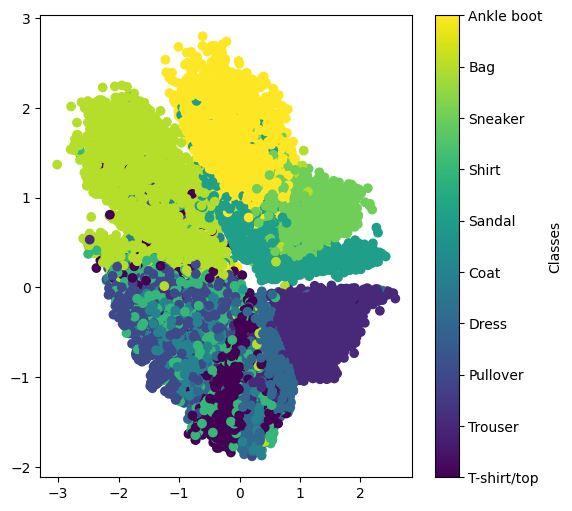

In [ ]:
# Define the class names and number of classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_classes = len(class_names)

# Plot of the digit classes in the latent space
x_train_latent = encoder.predict(x_train_flat, batch_size=batch_size)
plt.figure(figsize=(6, 6))

# Create a scatter plot with a color map
scatter = plt.scatter(x_train_latent[:, 0], x_train_latent[:, 1], c=y_train, cmap='viridis')

# Create a colorbar with class names as labels
colorbar = plt.colorbar(scatter, ticks=range(num_classes))
colorbar.set_label('Classes')
colorbar.set_ticks(range(num_classes))
colorbar.set_ticklabels(class_names)

plt.show()


In [ ]:
# build decoder
decoder_input = Input(shape=(z_dim,))
_z_decoded = z_decoder1(decoder_input)
_z_decoded = z_decoder2(_z_decoded)
_y = y_decoder(_z_decoded)
generator = Model(decoder_input, _y)
generator.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_49 (Dense)            (None, 128)               384       
                                                                 
 dense_50 (Dense)            (None, 256)               33024     
                                                                 
 dense_51 (Dense)            (None, 784)               201488    
                                                                 
Total params: 234,896
Trainable params: 234,896
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 18ms/step


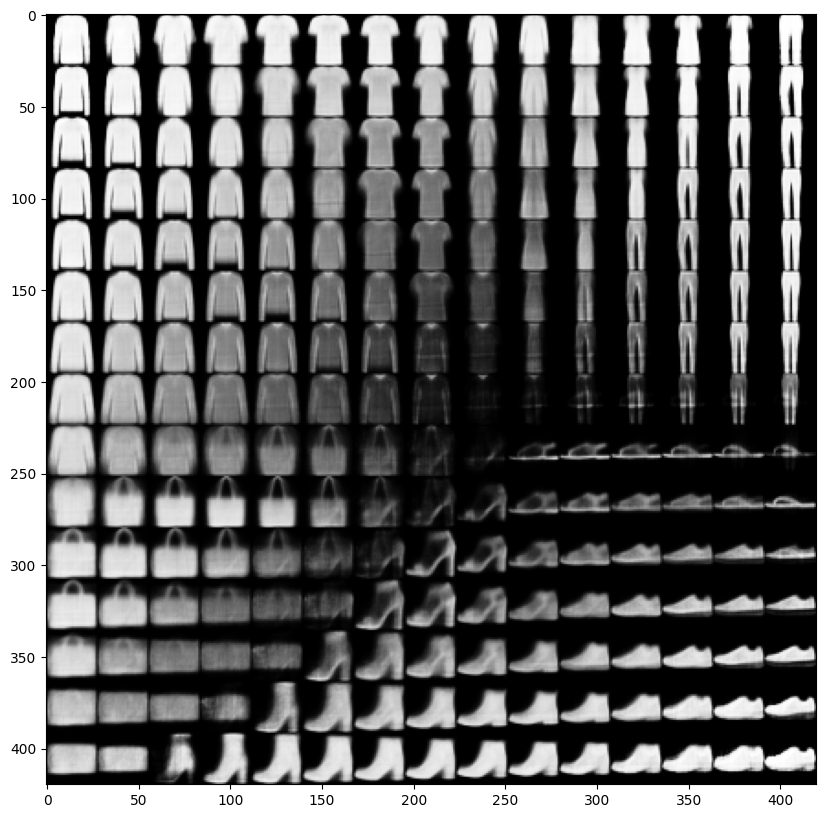

In [ ]:
from scipy.stats import norm as sp_norm
n = 15
img_size = 28
figure = np.zeros((img_size * n, img_size * n))

grid_x = sp_norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = sp_norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(img_size, img_size)
        figure[i * img_size: (i + 1) * img_size,
               j * img_size: (j + 1) * img_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()

##conv_VAE(latent_dim=8)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras.layers as layers
import keras
import tensorflow as tf
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon
latent_dim =8

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_10 (Conv2D)             (None, 14, 14, 32)   320         ['input_7[0][0]']                
                                                                                                  
 conv2d_11 (Conv2D)             (None, 7, 7, 64)     18496       ['conv2d_10[0][0]']              
                                                                                                  
 flatten_5 (Flatten)            (None, 3136)         0           ['conv2d_11[0][0]']              
                                                                                            

In [ ]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_10 (Dense)            (None, 3136)              28224     
                                                                 
 reshape_4 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_11 (Conv2D  (None, 14, 14, 64)       36928     
 Transpose)                                                      
                                                                 
 conv2d_transpose_12 (Conv2D  (None, 28, 28, 32)       18464     
 Transpose)                                                      
                                                                 
 conv2d_transpose_13 (Conv2D  (None, 28, 28, 1)        289 

In [ ]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [ ]:
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
x_train=np.expand_dims(x_train,-1)
vae.fit(x_train, epochs=30, batch_size=128)

Epoch 1/30
469/469 [==============================] - 8s 16ms/step - loss: 382.7234 - reconstruction_loss: 320.1840 - kl_loss: 9.8541
Epoch 2/30
469/469 [==============================] - 9s 18ms/step - loss: 272.9246 - reconstruction_loss: 258.8789 - kl_loss: 11.2158
Epoch 3/30
469/469 [==============================] - 5s 11ms/step - loss: 264.0246 - reconstruction_loss: 253.0202 - kl_loss: 10.5112
Epoch 4/30
469/469 [==============================] - 8s 17ms/step - loss: 260.8028 - reconstruction_loss: 250.2509 - kl_loss: 10.1796
Epoch 5/30
469/469 [==============================] - 9s 19ms/step - loss: 258.8378 - reconstruction_loss: 248.5845 - kl_loss: 10.0289
Epoch 6/30
469/469 [==============================] - 7s 15ms/step - loss: 257.4121 - reconstruction_loss: 247.5679 - kl_loss: 9.9493
Epoch 7/30
469/469 [==============================] - 7s 15ms/step - loss: 256.3091 - reconstruction_loss: 246.7281 - kl_loss: 9.9351
Epoch 8/30
469/469 [==============================] - 6s 1

In [ ]:
x_test = np.expand_dims(x_test, axis=-1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
train_encoded_8, _, _ = vae.encoder.predict(x_train)
test_encoded_8, _, _ = vae.encoder.predict(x_test)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(train_encoded_8, y_train)
y_pred = knn.predict(train_encoded_8)
print("Classification report(train) for conv VAE latent dimension 8:")
print(classification_report(y_train, y_pred))

313/313 [==============================] - 1s 2ms/step
Classification report(train) for conv VAE latent dimension 8:
              precision    recall  f1-score   support

           0       0.74      0.86      0.79      6000
           1       0.98      0.92      0.95      6000
           2       0.61      0.71      0.66      6000
           3       0.79      0.85      0.82      6000
           4       0.64      0.58      0.61      6000
           5       0.84      0.88      0.86      6000
           6       0.63      0.45      0.53      6000
           7       0.84      0.80      0.82      6000
           8       0.95      0.96      0.95      6000
           9       0.90      0.90      0.90      6000

    accuracy                           0.79     60000
   macro avg       0.79      0.79      0.79     60000
weighted avg       0.79      0.79      0.79     60000



In [ ]:
y_pred = knn.predict(test_encoded_8)
print("Classification report(test) for conv VAE latent dimension 8:")
print(classification_report(y_test, y_pred))

Classification report(test) for conv VAE latent dimension 8:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      1000
           1       0.97      0.90      0.94      1000
           2       0.51      0.61      0.56      1000
           3       0.75      0.80      0.77      1000
           4       0.52      0.47      0.50      1000
           5       0.83      0.86      0.85      1000
           6       0.48      0.35      0.40      1000
           7       0.83      0.78      0.80      1000
           8       0.93      0.95      0.94      1000
           9       0.87      0.89      0.88      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



##conv_VAE(latent_dim=2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras.layers as layers
import keras
import tensorflow as tf
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon
latent_dim =2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_12 (Conv2D)             (None, 14, 14, 32)   320         ['input_9[0][0]']                
                                                                                                  
 conv2d_13 (Conv2D)             (None, 7, 7, 64)     18496       ['conv2d_12[0][0]']              
                                                                                                  
 flatten_6 (Flatten)            (None, 3136)         0           ['conv2d_13[0][0]']              
                                                                                            

In [ ]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_12 (Dense)            (None, 3136)              9408      
                                                                 
 reshape_5 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_14 (Conv2D  (None, 14, 14, 64)       36928     
 Transpose)                                                      
                                                                 
 conv2d_transpose_15 (Conv2D  (None, 28, 28, 32)       18464     
 Transpose)                                                      
                                                                 
 conv2d_transpose_16 (Conv2D  (None, 28, 28, 1)        289 

In [ ]:
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(x_train, epochs=30, batch_size=128)

Epoch 1/30
469/469 [==============================] - 9s 16ms/step - loss: 390.4498 - reconstruction_loss: 333.3752 - kl_loss: 7.5351
Epoch 2/30
469/469 [==============================] - 6s 12ms/step - loss: 290.7757 - reconstruction_loss: 278.7150 - kl_loss: 8.3491
Epoch 3/30
469/469 [==============================] - 4s 9ms/step - loss: 279.9540 - reconstruction_loss: 271.0239 - kl_loss: 7.6656
Epoch 4/30
469/469 [==============================] - 7s 16ms/step - loss: 275.9893 - reconstruction_loss: 267.6554 - kl_loss: 7.5008
Epoch 5/30
469/469 [==============================] - 6s 14ms/step - loss: 273.4824 - reconstruction_loss: 265.9504 - kl_loss: 7.4364
Epoch 6/30
469/469 [==============================] - 9s 19ms/step - loss: 272.5715 - reconstruction_loss: 264.7854 - kl_loss: 7.4105
Epoch 7/30
469/469 [==============================] - 9s 20ms/step - loss: 271.3641 - reconstruction_loss: 263.8213 - kl_loss: 7.3878
Epoch 8/30
469/469 [==============================] - 6s 13ms/s

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
train_encoded_2, _, _ = vae.encoder.predict(x_train)
test_encoded_2, _, _ = vae.encoder.predict(x_test)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(train_encoded_2, y_train)
y_pred = knn.predict(train_encoded_2)
print("Classification report(train) for conv VAE latent dimension 2:")
print(classification_report(y_train, y_pred))

313/313 [==============================] - 1s 3ms/step
Classification report(train) for conv VAE latent dimension 2:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      6000
           1       0.97      0.88      0.92      6000
           2       0.53      0.68      0.60      6000
           3       0.71      0.81      0.76      6000
           4       0.57      0.57      0.57      6000
           5       0.81      0.86      0.83      6000
           6       0.52      0.28      0.36      6000
           7       0.83      0.79      0.81      6000
           8       0.84      0.82      0.83      6000
           9       0.91      0.88      0.89      6000

    accuracy                           0.74     60000
   macro avg       0.74      0.74      0.73     60000
weighted avg       0.74      0.74      0.73     60000



In [ ]:
y_pred = knn.predict(test_encoded_2)
print("Classification report(test) for conv VAE latent dimension 2:")
print(classification_report(y_test, y_pred))

Classification report(test) for conv VAE latent dimension 2:
              precision    recall  f1-score   support

           0       0.62      0.73      0.67      1000
           1       0.95      0.85      0.90      1000
           2       0.41      0.54      0.47      1000
           3       0.65      0.71      0.68      1000
           4       0.46      0.46      0.46      1000
           5       0.80      0.82      0.81      1000
           6       0.28      0.15      0.20      1000
           7       0.80      0.77      0.79      1000
           8       0.76      0.76      0.76      1000
           9       0.90      0.86      0.88      1000

    accuracy                           0.67     10000
   macro avg       0.66      0.67      0.66     10000
weighted avg       0.66      0.67      0.66     10000



469/469 [==============================] - 2s 4ms/step


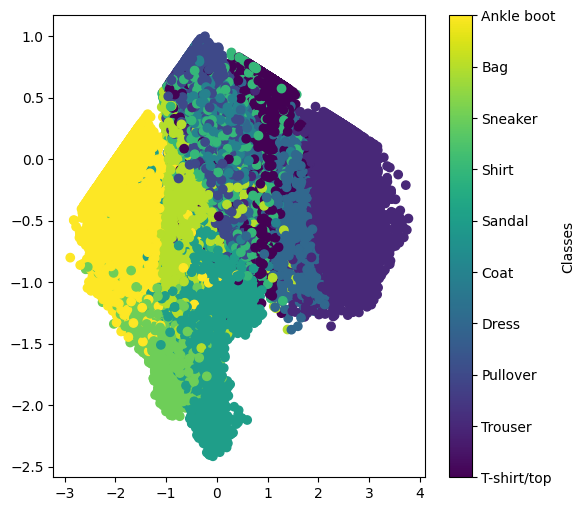

In [ ]:
# Define the class names and number of classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_classes = len(class_names)

# Plot of the digit classes in the latent space
x_train_latent,_,_ = vae.encoder.predict(x_train, batch_size=128)
plt.figure(figsize=(6, 6))

# Create a scatter plot with a color map
scatter = plt.scatter(x_train_latent[:,0], x_train_latent[:,1], c=y_train, cmap='viridis')

# Create a colorbar with class names as labels
colorbar = plt.colorbar(scatter, ticks=range(num_classes))
colorbar.set_label('Classes')
colorbar.set_ticks(range(num_classes))
colorbar.set_ticklabels(class_names)

plt.show()

1/1 [==============================] - 0s 16ms/step


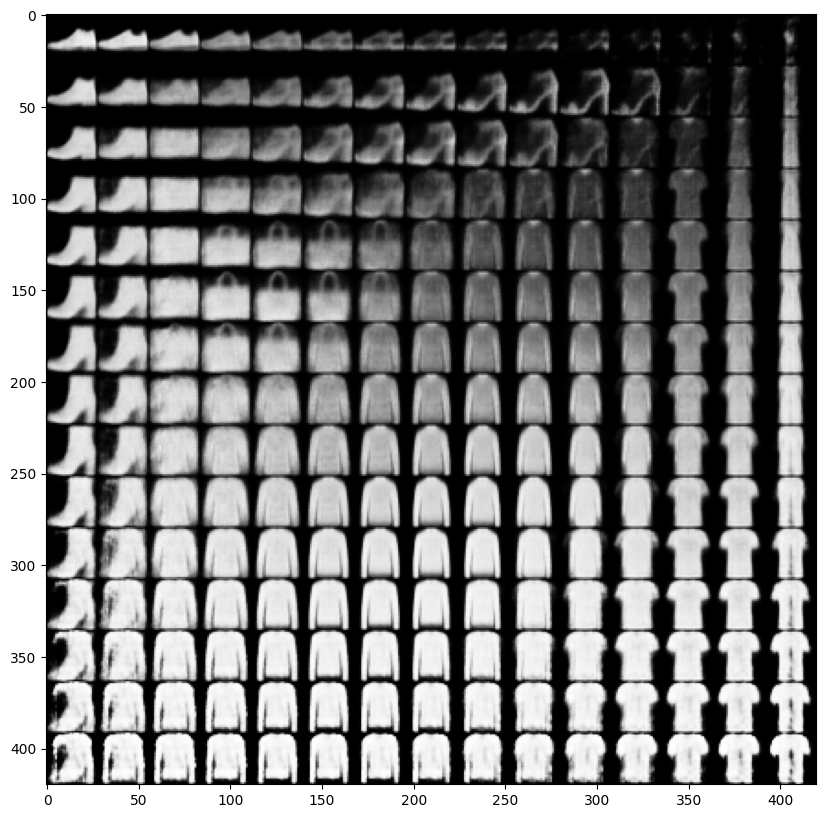

In [ ]:
from scipy.stats import norm as sp_norm
n = 15
img_size = 28
figure = np.zeros((img_size * n, img_size * n))

grid_x = sp_norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = sp_norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = vae.decoder.predict(z_sample)
        digit = x_decoded[0].reshape(img_size, img_size)
        figure[i * img_size: (i + 1) * img_size,
               j * img_size: (j + 1) * img_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()